In [18]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="This documment is written in a Jupyter notebook and the code used to produce these analyses has been hidden for ease of reading.  
To make the code visiable click here"></form>''')

In [1]:
# For more interactive visualizations (not always used in every presentation)
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [2]:
# Copyright 2021 Steven Mattis and Troy Butler
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as GKDE
from scipy.stats import beta

import ipywidgets as wd
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'axes.linewidth': 2})

np.random.seed(123456)

## <center> Learning Uncertain Quantities of Interest from Dynamical Systems
___
    
<center><font color='blue'>Steven Mattis</font>
    <br>
    Colorado State University
    <br>
    steve.a.mattis@gmail.com</center>
    
___

<center>Co-Authors
    
- Troy Butler, University of Colorado, Denver
    
- Kyle R. Steffen and Clint Dawson, University of Texas at Austin 
    
- Don Estep, Simon Fraser University, Canada </center>



#### <center>Reference for talk:
    
[Mattis, S., Steffen, K. R., Butler, T., Dawson, C. N., & Estep, D. (2020). Learning Quantities of Interest from Dynamical Systems for Observation-Consistent Inversion. arXiv preprint arXiv:2009.06918.
](https://arxiv.org/abs/2009.06918)

#### <center>This talk is a Jupyter notebook:
    
https://github.com/CU-Denver-UQ/LUQ/tree/master/Presentations/SIAM-CSE-2021/Mattis-

### <center> Outline of talk
---

* [Background:](#Intuition) Predictive Modeling


* [Motivating Problem](#Motivating) Harmonic Oscillator with noisy data.
    

* [LUQ Algorithm](#LUQ) Learning Uncertain Quantities.


* [SIP](#SIP) Application to Stochastic Inverse Problems.


<a id='Intuition'></a>
### <center> The Big Picture
___
    
<center><img src="figures/inf_pred_cartoon.png" width=70%>

<img src='figures/noisy-data.png'>

 ##### Raw observation data is
 
 * Noisy.
 
 * Contains many types of dynamics.
 
 * High-dimensional.
  
 


### <center> Learning Uncertain Quantities ([`LUQ`](https://github.com/CU-Denver-UQ/LUQ)) Methodology
___
Goal: Construct low-dimensional QoI that characterize dynamical behaviors to construct observation-consistent solutions on parameters.

    
- Step 1: Filter data (approximating dynamics) with adaptive piecewise linear splines
<br>
- Step 2: Clustering and classifying data (learning and classifying dynamics)
<br>
- Step 3: Feature extraction (learning quantities of interest)
 


<a id='Motivating'></a>
### <center> Motivating Problem: Harmonic Oscillator
    
$$y''(t) + 2cy'(t) + \omega_0^2 y = f(t)$$
with damping constant
$$c \in [0.1,1]$$
and natural frequency
$$\omega_0\in[0.5,1]$$
and forcing term initially taken to be zero.
    
The roots to the characteristic equation are given by
$$ r_{1,2} = -c\pm \sqrt{c^2-\omega_0^2}.$$

###  <center> Three types of dynamics

Underdamped
$$ y(t) = e^{-ct}[C_1\cos(\omega t) + C_2\sin(\omega t)], \ \omega=\sqrt{\omega_0^2-c^2}. $$

Overdamped
$$ y(t) = C_1 e^{r_1t}+C_2 e^{r_2t}. $$

Critically damped
$$ y(t) = C_1e^{-ct} + C_2 te^{-ct}. $$

<center> <img src='figures/noisy-dynamics.png' width=70%>

### <center> Filtering data (approximating dynamics)

* Approximate with piecewise linear splines 
    
* Allow adaptive numbers of knots and adaptive knot placement to approximate underlying dynamical responses.
    
* Can approximate the underlying dynamical response (assuming a particular regularity or finite number of discontinuities).
    
* Resample the filtered data.

### <center> Filtering data (approximating dynamics)
___
    
    
<table><tr><td><img src='figures/harmonic-oscillator-approximating-dynamics.png'></td><td><img src='figures/harmonic-oscillator-cleaning-data.png'></td></tr></table>



### <center> Clustering and classifying data (learning and classifying dynamics)

Different dynamics may be characterized by different QoI.

In the underdamped case, 
$$ C_1 = a, \ \text{and } \ C_2 = \frac{b+ca}{\omega}. $$

In the overdamped case, 
$$ C_1 = \frac{b-ar_2}{r_1-r_2}, \ \text{and } \ C_2 = \frac{b-r_1a}{r_2-r_1} $$


### <center> Clustering and classifying data

* First Goal: Use predicted data to determine the equivalent classes of dynamical behavior present in the observed data.
* Clustering: a type of unsupervised learning algorithm that label data vectors using a metric to gauge the distance of a vector from the proposed “center” of the cluster.
* Second Goal: Determine a way to tell to which cluster a time series belongs.
* Classifier: A type of supervised learning algorithm that uses labeled training data to determine labels for new data.

### <center> Clustering data (learning dynamics)</center>

<center><table><tr><td><img src='figures/harmonic-oscillator-cluster-1.png' width=40%></td></tr><tr><td><img src='figures/harmonic-oscillator-cluster-2.png' width=40%></td></tr><tr><td><img src='figures/harmonic-oscillator-cluster-3.png' width=40%></td></tr></table>


### <center> Classifying data (classifying dynamics)</center>

<center><table><tr><td><img src='figures/harmonic-oscillator-classifying-1.png' width=100%></td><td><img src='figures/harmonic-oscillator-classifying-2.png' width=100%></td><td><img src='figures/harmonic-oscillator-classifying-3.png' width=100%></td></tr></table>

### <center> Feature extraction (learning quantities of interest)

Feature extraction algorithms generally attempt to reduce the dimension of a data space into a relatively small number of quantities that explain most of the variation observed in the data.
    
<center><table><tr><td><img src='figures/harmonic-oscillator-PCs-cluster-1.png' width=75%></td><td><img src='figures/harmonic-oscillator-PCs-cluster-2.png' width=75%></td><td><img src='figures/harmonic-oscillator-PCs-cluster-3.png' width=75%></td></tr></table>
    
Noisy timeseries data are reduced to 2 QoI!

<a id='LUQ'></a>
### <center> Sel'kov model for glycolysis
$$x' = -(x+b) + a \left(y + \frac{b}{a+b^2} \right) + (x+b)^2 \left(y + \frac{b}{a+b^2}\right)$$
$$y' = b-a\left(y+ \frac{b}{a+b^2}\right) - (x+b)^2 \left(y + \frac{b}{a+b^2}\right), $$
where $x$ and $y$ represent concentrations of ADP and F6P, respectively, and $a,b>0$.
The initial conditions are $x(0) = x_0 \in \mathbb{R}$ and $y(0) = y_0 \in \mathbb{R}$.
    
The system has Hopf Bifurcations at two locations in parameter space.

### <center> LUQ Software, https://github.com/CU-Denver-UQ/LUQ)
* Python package for semi-automated process of learning uncertain quantities.
* Leverage methods within scikit-learn, https://scikit-learn.org/

In [3]:
from luq import *
import luq.dynamical_systems as ds
# Uniformly sample the parameter samples to form a "prediction" or "test" set
num_samples = int(3E3)

param_range = np.array([[0.01, 0.124], # a
                       [0.05, 1.5]])  #b
ic_range = np.array([[1.0, 1.0],  # y_0
                     [1.0, 1.0]])  # x_0

params = np.random.uniform(size=(num_samples, 2))
params = param_range[:, 0] + (param_range[:, 1] - param_range[:, 0]) * params

ics = np.random.uniform(size=(num_samples, 2))
ics = ic_range[:, 0] + (ic_range[:, 1] - ic_range[:, 0]) * ics

# labels
param_labels = [r'$a$', r'$b$']
ic_labels = [r'$x_0$', r'$y_0$']

# Construct the predicted time series data
time_start = 2.0 #0.5
time_end = 6.5 #40.0
num_time_preds = int((time_end-time_start)*100)  # number of predictions (uniformly space) between [time_start,time_end]
times = np.linspace(time_start, time_end, num_time_preds)

# Solve systems
phys = ds.Selkov()
predicted_time_series = phys.solve(ics=ics, params=params, t_eval=times)

In [4]:
# Simulate an observed Beta distribution of time series data

num_obs = int(5E2)

true_a = 2
true_b = 2

params_obs = np.random.beta(size=(num_obs, 2), a=true_a, b=true_b)
params_obs = param_range[:, 0] + (param_range[:, 1] - param_range[:, 0]) * params_obs

ics_obs = np.random.beta(size=(num_obs, 2), a=true_a, b=true_b)
ics_obs = ic_range[:, 0] + (ic_range[:, 1] - ic_range[:, 0]) * ics_obs

# Solve system
observed_time_series = phys.solve(ics=ics_obs, params=params_obs, t_eval=times)

# Add noise if desired
with_noise = True
noise_stdev = 0.0125

if with_noise:
    observed_time_series += noise_stdev * np.random.randn(num_obs, times.shape[0])

<font size="4">`from luq import LUQ  # Import LUQ module
learn = LUQ(predicted_time_series, observed_time_series, times) # Initialize LUQ object
learn.filter_data(time_start_idx=time_start_idx, time_end_idx=time_end_idx,
                 num_filter_obs=num_filter_obs, tol=tol, min_knots=min_knots, 
                 max_knots=max_knots) # Filter data with given options`
                

In [5]:
%%capture
# Use LUQ to learn dynamics and QoIs
learn = luq.LUQ(predicted_time_series, observed_time_series, times)

# time array indices over which to use
time_start_idx = 0
time_end_idx = len(times) - 1

# Filter data
learn.filter_data(time_start_idx=time_start_idx, time_end_idx=time_end_idx,
                 num_filtered_obs=20, tol=5.0e-2, min_knots=3, max_knots=12);

In [6]:
# Learn and classify dynamics
learn.dynamics(cluster_method='kmeans', kwargs={'n_clusters': 3, 'n_init': 10})

0.003333333333333333 misclassification rate for  {'kernel': 'linear'}
0.008666666666666666 misclassification rate for  {'kernel': 'rbf'}
0.507 misclassification rate for  {'kernel': 'poly'}
0.011 misclassification rate for  {'kernel': 'sigmoid'}
Best classifier is  {'kernel': 'linear'}
Misclassification rate is  0.003333333333333333


<IPython.core.display.Javascript object>


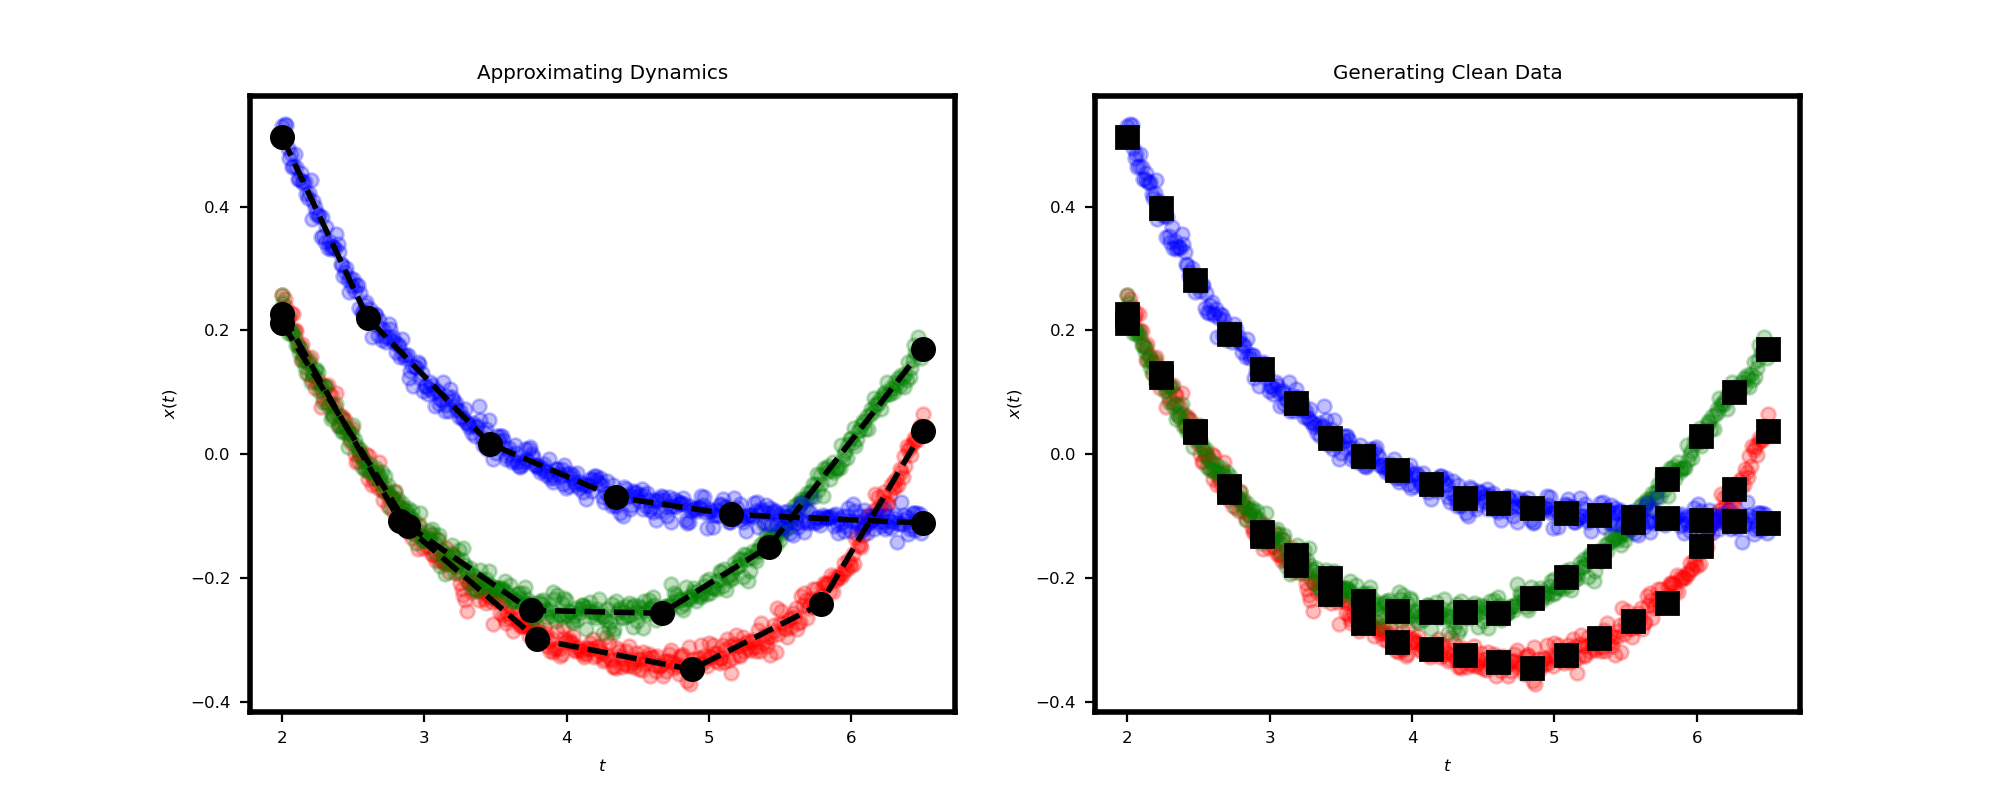

Text(0.5, 1.0, 'Generating Clean Data')

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), gridspec_kw={'width_ratios': [1, 1]}) 

# chosen_obs = [109, 8]

chosen_obs = [0, 2, 5]  #7]
colors = ['r', 'g', 'b']

for i, c in zip(chosen_obs,colors):
    ax1.plot(learn.times[time_start_idx:time_end_idx+1], learn.observed_time_series[i,time_start_idx:time_end_idx+1],color=c, linestyle='none', marker='.', markersize=10, alpha=0.25)
    
for i in chosen_obs:
    num_i_knots = int(0.5*(2+len(learn.obs_knots[i])))
    knots = np.copy(learn.obs_knots[i][num_i_knots:])
    knots = np.insert(knots, 0, learn.clean_times[0])
    knots = np.append(knots, learn.clean_times[-1])
    ax1.plot(knots, learn.obs_knots[i][:num_i_knots], 'k', linestyle='dashed', markersize=8, marker='o', linewidth=2)
    
ax1.set_xlabel('$t$')
ax1.set_ylabel('$x(t)$')
ax1.set_title('Approximating Dynamics') 

for i, c in zip(chosen_obs,colors):
    ax2.plot(learn.times[time_start_idx:time_end_idx+1], learn.observed_time_series[i,time_start_idx:time_end_idx+1],color=c, linestyle='none', marker='.', markersize=10, alpha=0.25)
    
for i in chosen_obs:
    ax2.plot(learn.clean_times, learn.clean_obs[i,:],'k', linestyle='none', marker='s', 
            markersize=8)
    
ax2.set_xlabel('$t$')
ax2.set_ylabel('$x(t)$')
ax2.set_title('Generating Clean Data') 

#### Learn and classify dynamics
<font size="4.5">`learn.dynamics(cluster_method='kmeans',
               kwargs={'n_clusters': 3, 'n_init': 10},
               proposals = ({'kernel': 'linear'},
                {'kernel': 'rbf'}, {'kernel': 'poly'}, {'kernel': 'sigmoid'}),
               k = 10)`
______________________________
`0.011 misclassification rate for  {'kernel': 'linear'}
0.037 misclassification rate for  {'kernel': 'rbf'}
0.022 misclassification rate for  {'kernel': 'poly'}
0.4170000000000001 misclassification rate for  {'kernel': 'sigmoid'}
Best classifier is  {'kernel': 'linear'}
Misclassification rate is  0.011`</font>

<IPython.core.display.Javascript object>


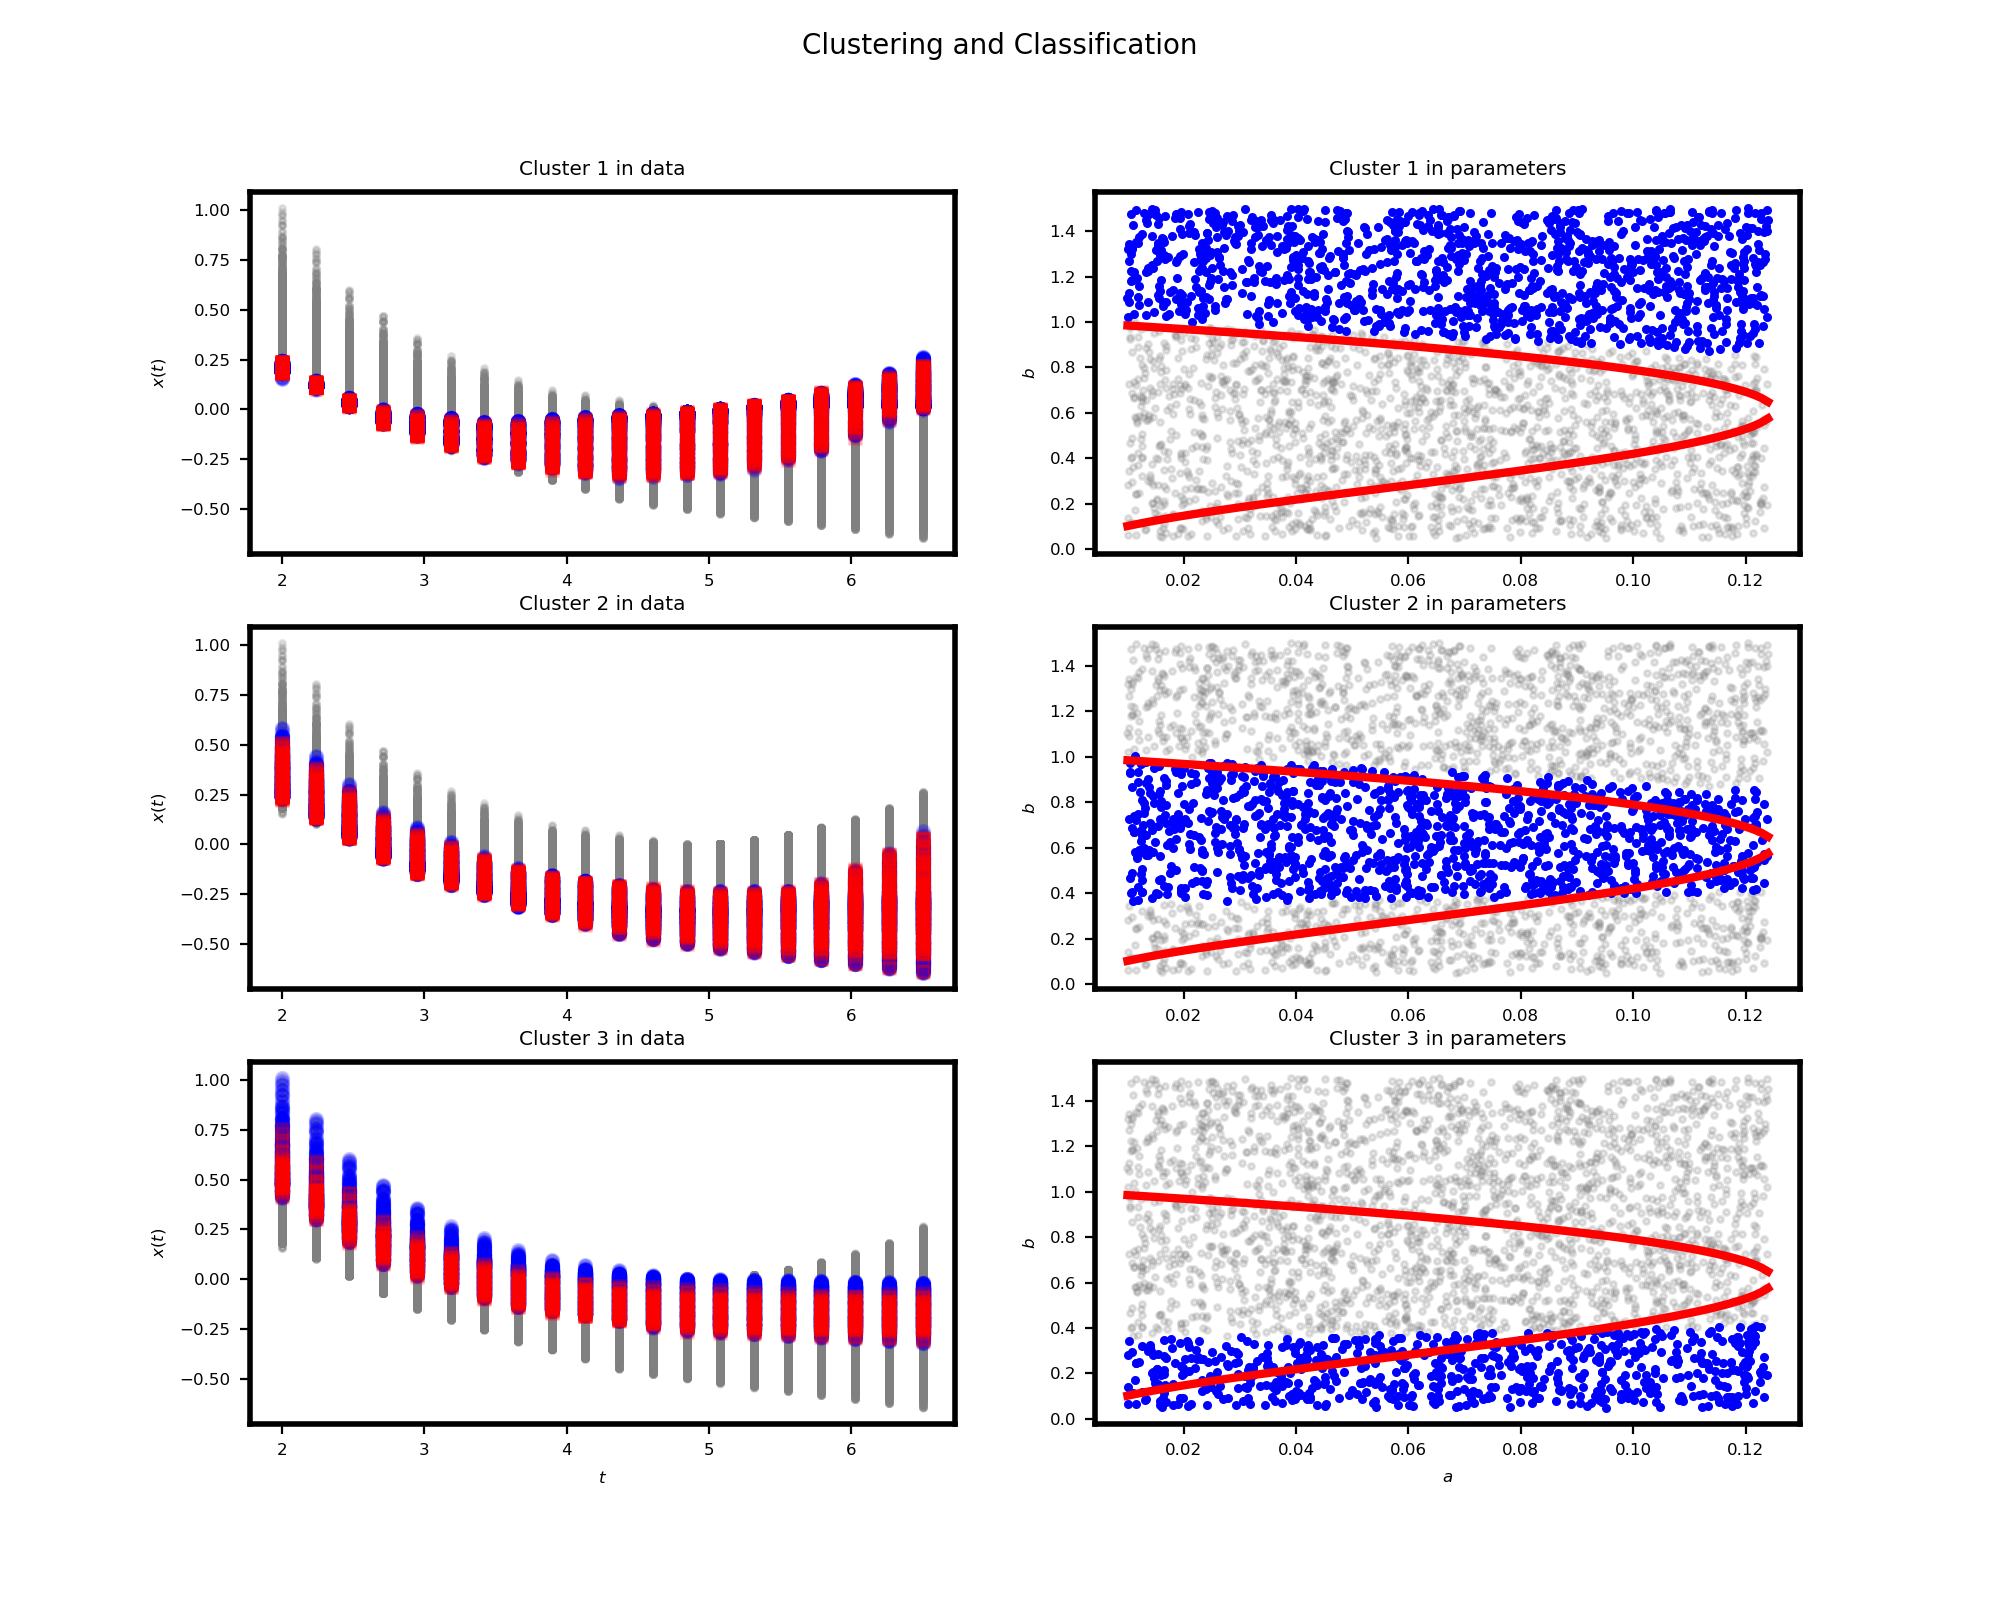

<bound method Figure.tight_layout of <Figure size 1000x800 with 6 Axes>>

In [15]:
plt.rcParams.update({'font.size': 6})

# # Plot clusters of predicted time serie
fig, ax = plt.subplots(3, 2, figsize=(10,8), gridspec_kw={'width_ratios': [1, 1]}) 

num_clean_obs = learn.clean_times.shape[0]
for j in range(learn.num_clusters):
    ax[j][0].scatter(np.tile(learn.clean_times,num_samples).reshape(num_samples, num_clean_obs), 
                learn.clean_predictions, 20, c='gray', marker='.', alpha=0.2)
    idx = np.where(learn.predict_labels == j)[0]
    ax[j][0].scatter(np.tile(learn.clean_times,len(idx)).reshape(len(idx),num_clean_obs), 
                learn.clean_predictions[idx,:], 20, c='b', marker='o', alpha=0.2)
    idx2 = np.where(learn.obs_labels == j)[0]    
    ax[j][0].scatter(np.tile(learn.clean_times,len(idx2)).reshape(len(idx2),num_clean_obs), 
                learn.clean_obs[idx2, :], 20, c='r', marker='s', alpha=0.2)
    ax[j][0].set(title='Cluster ' + str(j+1) + ' in data')
    ax[j][0].set_ylabel('$x(t)$')
    
    ax2 = ax[j][1]
    ax2.scatter(params[:,0], params[:,1], 20, c='gray', marker='.', alpha=0.2)
    ax2.scatter(params[idx,0], params[idx,1], 5, c='blue', marker='o')
    ax2.set(title='Cluster ' + str(j+1) + ' in parameters')
    ax2.set_ylabel(param_labels[1])
    xs = np.linspace(param_range[0,0], param_range[0,1], 100)
    ys1 = np.sqrt(0.5*(1.0 - np.sqrt(1.0 - 8.0*xs) -2.0*xs))
    ys2 = np.sqrt(0.5*(1.0 + np.sqrt(1.0 - 8.0*xs) -2.0*xs))
    ax2.plot(xs, ys1, 'r-', linewidth=3)
    ax2.plot(xs, ys2, 'r-', linewidth=3)
ax[2][0].set_xlabel('$t$')
ax[2][1].set_xlabel(param_labels[0])
fig.suptitle("Clustering and Classification", fontsize=10)
fig.tight_layout

<font size="4">`predict_map, obs_map = learn.learn_qois_and_transform(num_qoi=1,
                             proposals=({'kernel': 'linear'}, {'kernel': 'rbf'}, {'kernel': 'sigmoid'}, {'kernel': 'cosine'}))`
______________________________________________________
`2 PCs explain 98.9222% of var. for cluster 1 with {'kernel': 'linear'}
2 PCs explain 51.2613% of var. for cluster 1 with {'kernel': 'rbf'}
2 PCs explain 91.4506% of var. for cluster 1 with {'kernel': 'sigmoid'}
2 PCs explain 71.7679% of var. for cluster 1 with {'kernel': 'poly'}
2 PCs explain 98.7201% of var. for cluster 1 with {'kernel': 'cosine'}`
---------------------------------------------
`Best kPCA for cluster  1  is  {'kernel': 'linear'}
2 PCs explain 98.9222% of variance.`
---------------------------------------------
`2 PCs explain 99.9406% of var. for cluster 2 with {'kernel': 'linear'}
2 PCs explain 69.4575% of var. for cluster 2 with {'kernel': 'rbf'}
2 PCs explain 94.8345% of var. for cluster 2 with {'kernel': 'sigmoid'}
2 PCs explain 91.5822% of var. for cluster 2 with {'kernel': 'poly'}
2 PCs explain 99.8379% of var. for cluster 2 with {'kernel': 'cosine'}`
---------------------------------------------
`Best kPCA for cluster  2  is  {'kernel': 'linear'}
2 PCs explain 99.9406% of variance.`
---------------------------------------------`

In [9]:
# Find best KPCA transformation for given number of QoI and transform time series data.
predict_map, obs_map = learn.learn_qois_and_transform(num_qoi=2)

2 PCs explain 95.2103% of var. for cluster 1 with {'kernel': 'linear'}
2 PCs explain 63.3349% of var. for cluster 1 with {'kernel': 'rbf'}
{'kernel': 'sigmoid'}  not supported.
2 PCs explain 0.0000% of var. for cluster 1 with {'kernel': 'sigmoid'}
2 PCs explain 82.1701% of var. for cluster 1 with {'kernel': 'poly'}
2 PCs explain 91.3589% of var. for cluster 1 with {'kernel': 'cosine'}
---------------------------------------------
Best kPCA for cluster  1  is  {'kernel': 'linear'}
2 PCs explain 95.2103% of variance.
---------------------------------------------
2 PCs explain 98.9983% of var. for cluster 2 with {'kernel': 'linear'}
2 PCs explain 53.4940% of var. for cluster 2 with {'kernel': 'rbf'}
{'kernel': 'sigmoid'}  not supported.
2 PCs explain 0.0000% of var. for cluster 2 with {'kernel': 'sigmoid'}
2 PCs explain 78.8630% of var. for cluster 2 with {'kernel': 'poly'}
2 PCs explain 97.7936% of var. for cluster 2 with {'kernel': 'cosine'}
---------------------------------------------

In [16]:
%reset -f out

def plot_gap(all_eig_vals, n, cluster):
    fig = plt.figure(figsize=(5,4))
    fig.clear()
    #Plotting until maximum number of knots
    eig_vals = all_eig_vals[cluster].lambdas_[0:10]
    plt.semilogy(np.arange(np.size(eig_vals))+1,eig_vals/np.sum(eig_vals)*100, marker='.', markersize=20, linestyle='')
    plt.semilogy(np.arange(np.size(eig_vals))+1,eig_vals[n]/np.sum(eig_vals)*100*np.ones(np.size(eig_vals)), 'k--')
    plt.semilogy(np.arange(np.size(eig_vals))+1,eig_vals[n+1]/np.sum(eig_vals)*100*np.ones(np.size(eig_vals)), 'r--')
    plt.text(n+1, eig_vals[n]/np.sum(eig_vals)*150, 
             r'%2.3f' %(np.sum(eig_vals[0:n+1])/np.sum(eig_vals)*100) + '% of variation explained by first ' + '%1d' %(n+1) + ' PCs.', 
                                                               {'color': 'k', 'fontsize': 10})
    plt.text(n+2, eig_vals[n+1]/np.sum(eig_vals)*150, 
             r'Order of magnitude of gap is %4.2f.' %(np.log10(eig_vals[n])-np.log10(eig_vals[n+1])), 
                                                               {'color': 'r', 'fontsize': 10})
    s = 'Determining QoI for cluster #%1d' %(cluster+1)
    plt.title(s)
    plt.xlabel('Principal Component #')
    plt.ylabel('% of Variation')
    plt.xlim([0.1, np.size(eig_vals)+1])
    plt.ylim([1.0e-8,500])


wd.interact(plot_gap, all_eig_vals=wd.fixed(learn.kpcas),
            n = wd.IntSlider(value=0, min=0, max=5),
            cluster = wd.IntSlider(value=0, min=0, max=learn.num_clusters-1))

Flushing output cache (5 entries)


interactive(children=(IntSlider(value=0, description='n', max=5), IntSlider(value=0, description='cluster', ma…

<function __main__.plot_gap(all_eig_vals, n, cluster)>

<a id='SIP'></a>
### Observation-Consistent Stochastic Inverse Problems

* Solution described by a pullback probability measure. 
* Subsequent push-forward through the QoI map matches the observed probability distribution on model outputs.
* Density-based approaches to observation-consistent inversion-> Curse of dimensionality! (due to use of Gaussian kernel density estimates)

For more see:
Thursday, March 4, MS323, Recent Advances in Computational Probability - Part I of II

2:15-2:30 Learning Quantities of Interest from Dynamical Systems for Observation-Consistent Inversion

Speaker: Troy Butler


### <center> Approx. error in $L^1$ of updated density vs. Num. Samples used in GKDE.
___
    
<center><img src="figures/convergence_linearQ_QDim_m_vs_samples.png" width=70%/>

### Observation-Consistent SIP Solution to Harmonic Oscillator Problem

<table><tr><td><img src='figures/harmonic-oscillator-densities-c.png'></td><td><img src='figures/harmonic-oscillator-densities-omega.png'
                                                                                              ></td></tr></table>

In [11]:
# Generate kernel density estimates on new QoI
learn.generate_kdes()
# Calculate rejection rates for each cluster and print averages.
r_vals = learn.compute_r()

# Compute marginal probablities for each parameter and initial condition.
param_marginals = []
ic_marginals = []
true_param_marginals = []
true_ic_marginals = []
lam_ptr = []
cluster_weights = []
for i in range(learn.num_clusters):
    lam_ptr.append(np.where(learn.predict_labels == i)[0])
    cluster_weights.append(len(np.where(learn.obs_labels == i)[0]) / num_obs)

for i in range(params.shape[1]):
    true_param_marginals.append(GKDE(params_obs[:,i]))
    param_marginals.append([])
    for j in range(learn.num_clusters):
        param_marginals[i].append(GKDE(params[lam_ptr[j], i], weights=learn.r[j]))
        
# uniform distribution
def unif_dist(x, p_range):
    y = np.zeros(x.shape)
    val = 1.0/(p_range[1] - p_range[0])
    for i, xi in enumerate(x):
        if xi < p_range[0] or xi >  p_range[1]:
            y[i] = 0
        else:
            y[i] = val
    return y

Diagnostic for clusters [sample average of ratios in each cluster]: [0.8768016413824955, 0.986788526837198, 1.0175973664500504]


<IPython.core.display.Javascript object>


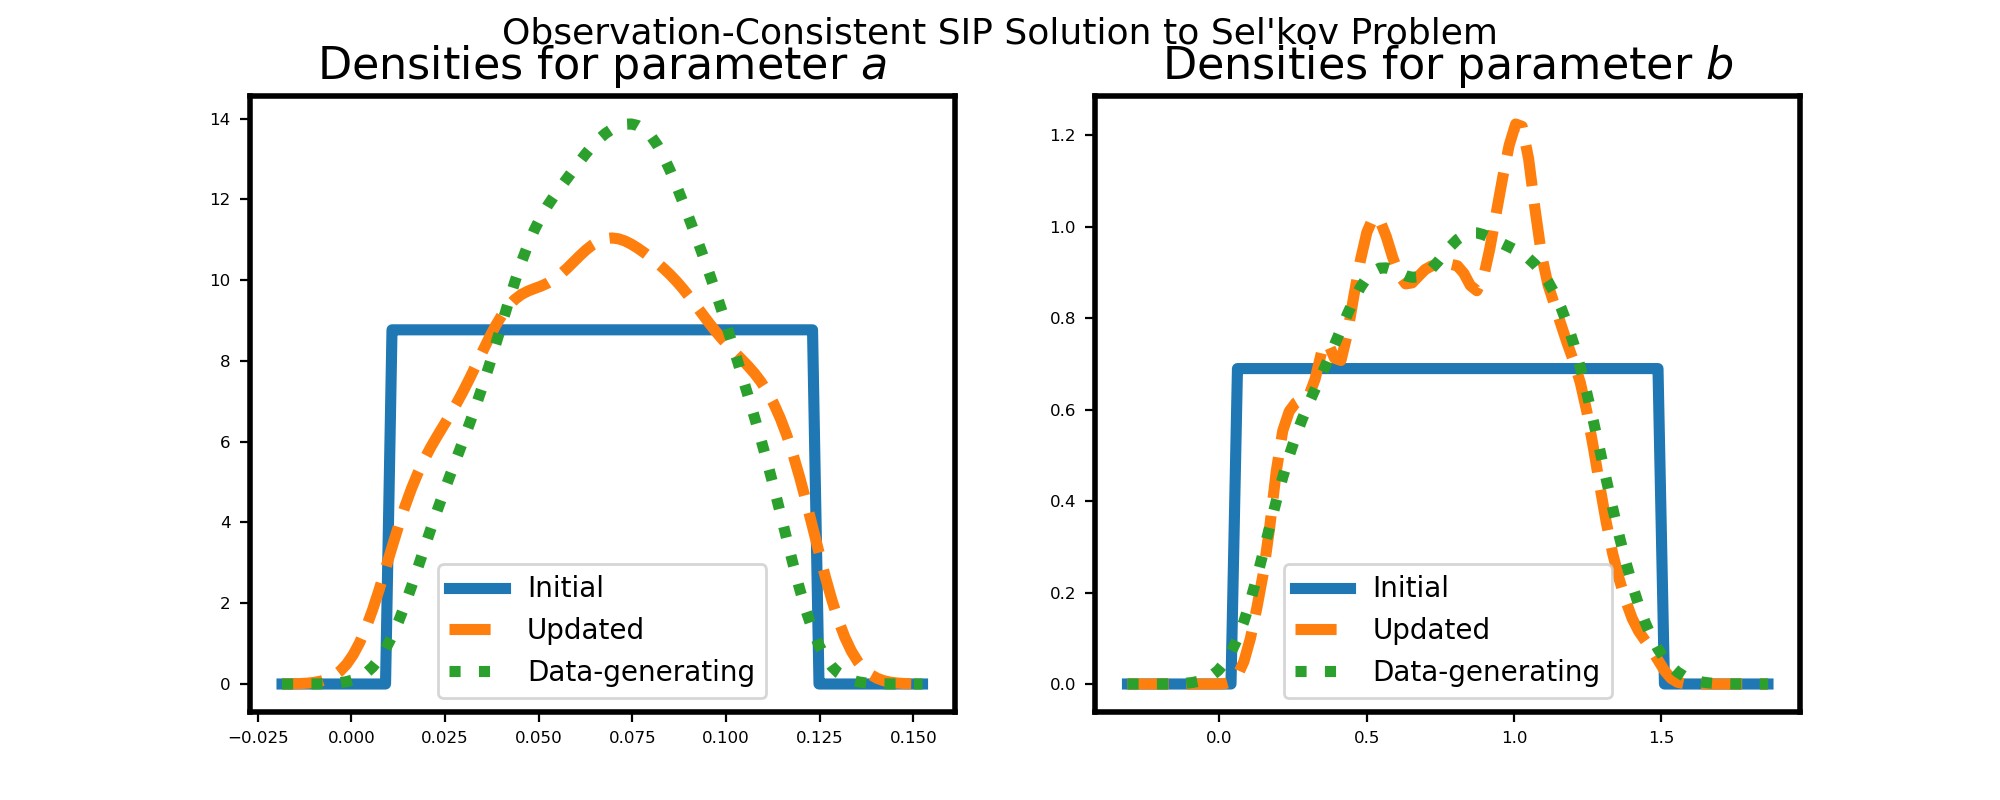

Text(0.5, 0.98, "Observation-Consistent SIP Solution to Sel'kov Problem")

In [17]:
# Plot predicted marginal densities for parameters
fig, ax = plt.subplots(1, 2, figsize=(10,4), gridspec_kw={'width_ratios': [1, 1]}) 

for i in range(params.shape[1]):  
    x_min = min(min(params[:, i]), min(params_obs[:, i]))
    x_max = max(max(params[:, i]), max(params_obs[:, i]))
    delt = 0.25*(x_max - x_min)
    x = np.linspace(x_min-delt, x_max+delt, 100)
    ax[i].plot(x, unif_dist(x, param_range[i, :]),
         label = 'Initial', linewidth=4)
    mar = np.zeros(x.shape)
    for j in range(learn.num_clusters):
        mar += param_marginals[i][j](x) * cluster_weights[j]
    ax[i].plot(x, mar, label = 'Updated', linewidth=4, linestyle='dashed')
    ax[i].plot(x, true_param_marginals[i](x), label = 'Data-generating', 
             linewidth=4, linestyle='dotted')
    ax[i].set_title('Densities for parameter ' + param_labels[i], fontsize=16)
    ax[i].legend(fontsize=10)
    if i == 0:
        plt.xticks([0, 0.05, 0.1, 0.15])
    else:
        plt.xticks([0, 0.5, 1., 1.5])
fig.suptitle("Observation-Consistent SIP Solution to Sel'kov Problem", fontsize=13)

### Thanks for Listening!

### Any questions?

Funding from NSF DMS-1818777

#### Links
https://github.com/CU-Denver-UQ/LUQ

https://github.com/UT-CHG/BET
